Config inicial

In [1]:
from src.recommender import InteractiveRecommender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

recommender = InteractiveRecommender("data/usuarios_filmes.csv")
usuarios = recommender.usuarios

Gráfico de distribuição

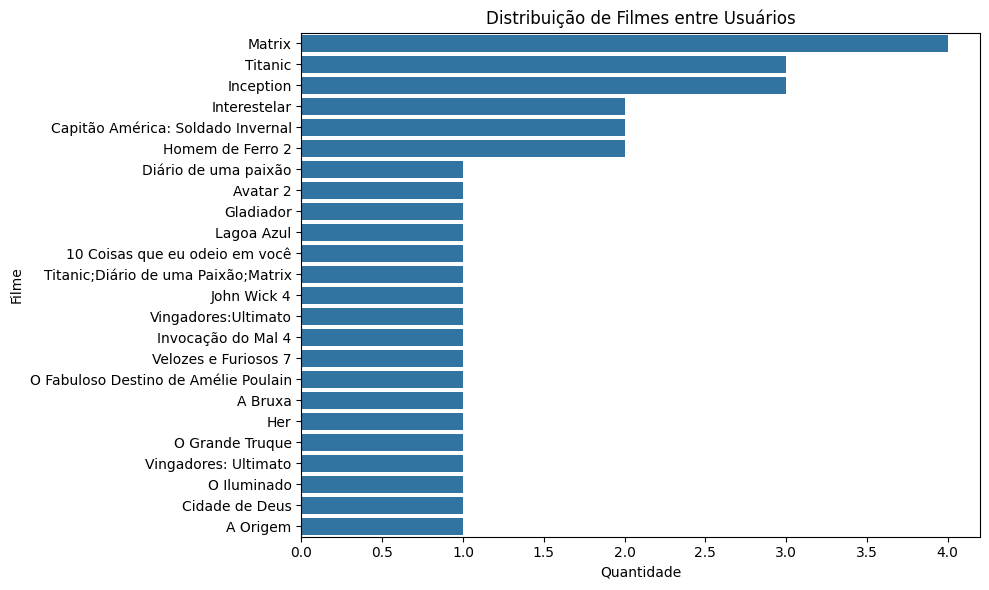

In [2]:
todos_filmes = [filme for u in recommender.usuarios.values() for filme in u["filmes"]]
df_filmes = pd.Series(todos_filmes).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=df_filmes.values, y=df_filmes.index)
plt.title("Distribuição de Filmes entre Usuários")
plt.xlabel("Quantidade")
plt.ylabel("Filme")
plt.tight_layout()
plt.show()

Matriz de similaridade

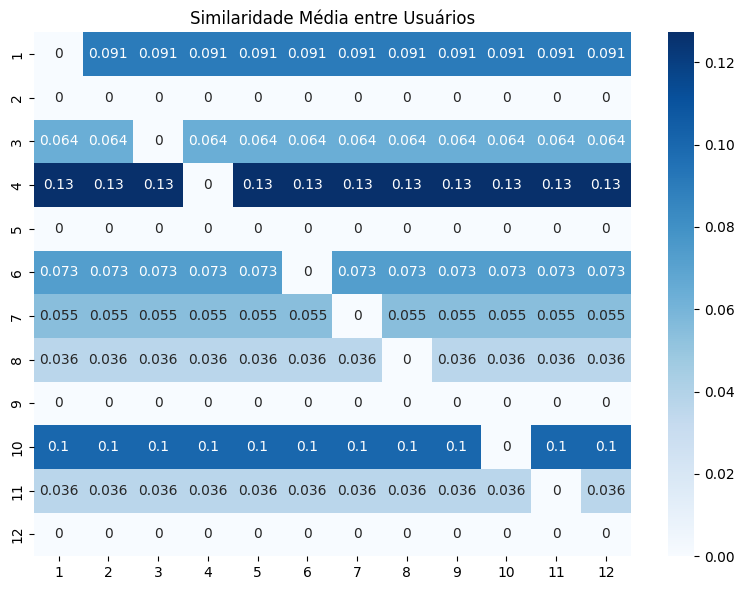

In [3]:
usuarios = list(recommender.usuarios.keys())
matriz = np.zeros((len(usuarios), len(usuarios)))

for i, u1 in enumerate(usuarios):
    for j, u2 in enumerate(usuarios):
        if u1 != u2:
            matriz[i][j] = recommender.media_similaridade(u1)

plt.figure(figsize=(8,6))
sns.heatmap(matriz, xticklabels=usuarios, yticklabels=usuarios, annot=True, cmap="Blues")
plt.title("Similaridade Média entre Usuários")
plt.tight_layout()
plt.show()

Teste de recomendação

In [4]:
user_id = 7  # Escolha um usuário para testar
recs = recommender.recommend_by_similarity(user_id)
print(f"Recomendações para o usuário {user_id} ({recommender.usuarios[user_id]['nome']}):")
print(recs)

Recomendações para o usuário 7 (Paula):
['Vingadores: Ultimato', 'Matrix', 'Velozes e Furiosos 7', 'Invocação do Mal 4', 'Avatar 2']


Recomendações por método (simples, similaridade(Jaccard) e Cluster)

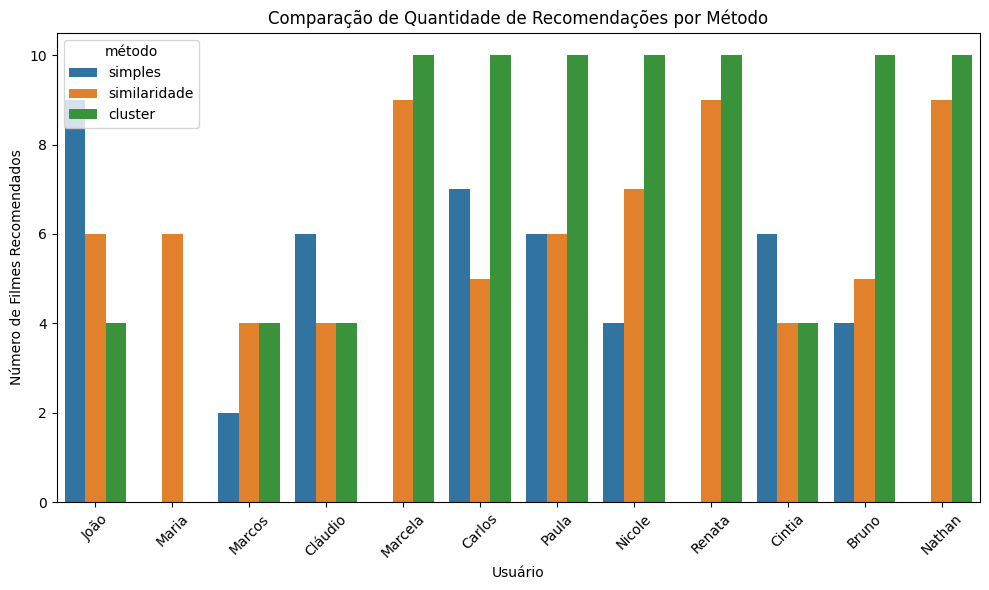

In [8]:
user_ids = list(recommender.usuarios.keys())
resultados = []

for user_id in user_ids:
    nome = recommender.usuarios[user_id]["nome"]
    filmes_simples = recommender.recommend(user_id, top_n=10)
    filmes_similaridade = recommender.recommend_by_similarity(user_id, top_n=10)
    filmes_cluster = recommender.recommend_by_cluster(user_id, top_n=10)

    resultados.append({
        "user_id": user_id,
        "nome": nome,
        "simples": len(filmes_simples),
        "similaridade": len(filmes_similaridade),
        "cluster": len(filmes_cluster)
    })

df_resultados = pd.DataFrame(resultados)

df_melted = df_resultados.melt(
    id_vars=["nome"],
    value_vars=["simples", "similaridade", "cluster"],
    var_name="método",
    value_name="quantidade"
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="nome", y="quantidade", hue="método")
plt.title("Comparação de Quantidade de Recomendações por Método")
plt.ylabel("Número de Filmes Recomendados")
plt.xlabel("Usuário")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Matriz de confusão e outras métricas que vimos em aula:

Matriz de Confusão:
TP=0, FN=83, FP=137, TN=876
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00


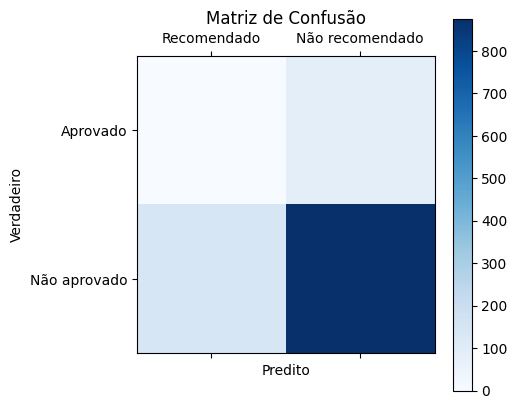

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.recommender import InteractiveRecommender

# --- Inicializa o recommender ---
recommender = InteractiveRecommender()

# --- Prepara contadores para matriz de confusão ---
TP = FP = FN = TN = 0
top_n = 5  # número de recomendações por usuário

# --- Avaliação por usuário ---
for uid, u in recommender.users.items():
    filmes_aprovados = set(u["movies"])  # filmes que o usuário aprovou
    todos_filmes = set(recommender.movies.keys())
    filmes_nao_aprovados = todos_filmes - filmes_aprovados

    recs = set(recommender.get_recommendations(uid, top_n=top_n))

    # Verdadeiro Positivo: aprovado e recomendado
    TP += len(filmes_aprovados & recs)
    # Falso Negativo: aprovado mas não recomendado
    FN += len(filmes_aprovados - recs)
    # Falso Positivo: não aprovado mas recomendado
    FP += len(filmes_nao_aprovados & recs)
    # Verdadeiro Negativo: não aprovado e não recomendado
    TN += len(filmes_nao_aprovados - recs)

# --- Calcula métricas ---
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# --- Matriz de confusão ---
cm = [[TP, FN], [FP, TN]]

print(f"Matriz de Confusão:\nTP={TP}, FN={FN}, FP={FP}, TN={TN}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# --- Plot ---
plt.matshow(cm, cmap="Blues")
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.xticks([0,1], ["Recomendado", "Não recomendado"])
plt.yticks([0,1], ["Aprovado", "Não aprovado"])
plt.show()
